In [11]:
import numpy as np
from numpy.random import normal as normal
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
import pandas as pd
from glob import glob
#from IPython.display import HTML
import cartopy.io.img_tiles as cigmt
import cartopy.crs as ccrs
import matplotlib as mpl
      

numpy: 1.20.3
matplotlib: 3.4.3


In [12]:
files = glob('/home/aakash/Desktop/Reference_Papers/Keith_Koper/Tasks/Task_2/*')
files

['/home/aakash/Desktop/Reference_Papers/Keith_Koper/Tasks/Task_2/task2.docx',
 '/home/aakash/Desktop/Reference_Papers/Keith_Koper/Tasks/Task_2/uuss_ysn.final.2021.pdf',
 '/home/aakash/Desktop/Reference_Papers/Keith_Koper/Tasks/Task_2/yellake.map',
 '/home/aakash/Desktop/Reference_Papers/Keith_Koper/Tasks/Task_2/YELLOWSTONEeq.catalog',
 '/home/aakash/Desktop/Reference_Papers/Keith_Koper/Tasks/Task_2/Yellowstone_seismicity_map.png',
 '/home/aakash/Desktop/Reference_Papers/Keith_Koper/Tasks/Task_2/yell.border.g']

In [13]:
eq_cat_file = glob('/home/aakash/Desktop/Reference_Papers/Keith_Koper/Tasks/Task_2/*')[-2]
ev_lats_ddm = pd.read_csv(eq_cat_file,names=['Lat_Degree','Lat_Minute'],skipinitialspace=True,sep=' ',usecols=[3,4])
ev_lats =  ev_lats_ddm.values[:,0]+(ev_lats_ddm.values[:,1])/60
ev_lons_ddm = pd.read_csv(eq_cat_file,names=['Lon_Degree','Lon_Minute'],skipinitialspace=True,sep=' ',usecols=[5,6])
ev_lons =  (ev_lons_ddm.values[:,0]+(ev_lons_ddm.values[:,1])/60)*(-1)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [14]:
depths_total = pd.read_csv(eq_cat_file,names=['Depth'],skipinitialspace=True,sep=' ',usecols=[7])
depths_before_2012 = depths_total.values[0:39003,0]
depths_after_2012 = depths_total.values[39003:-1,0]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

<IPython.core.display.Javascript object>


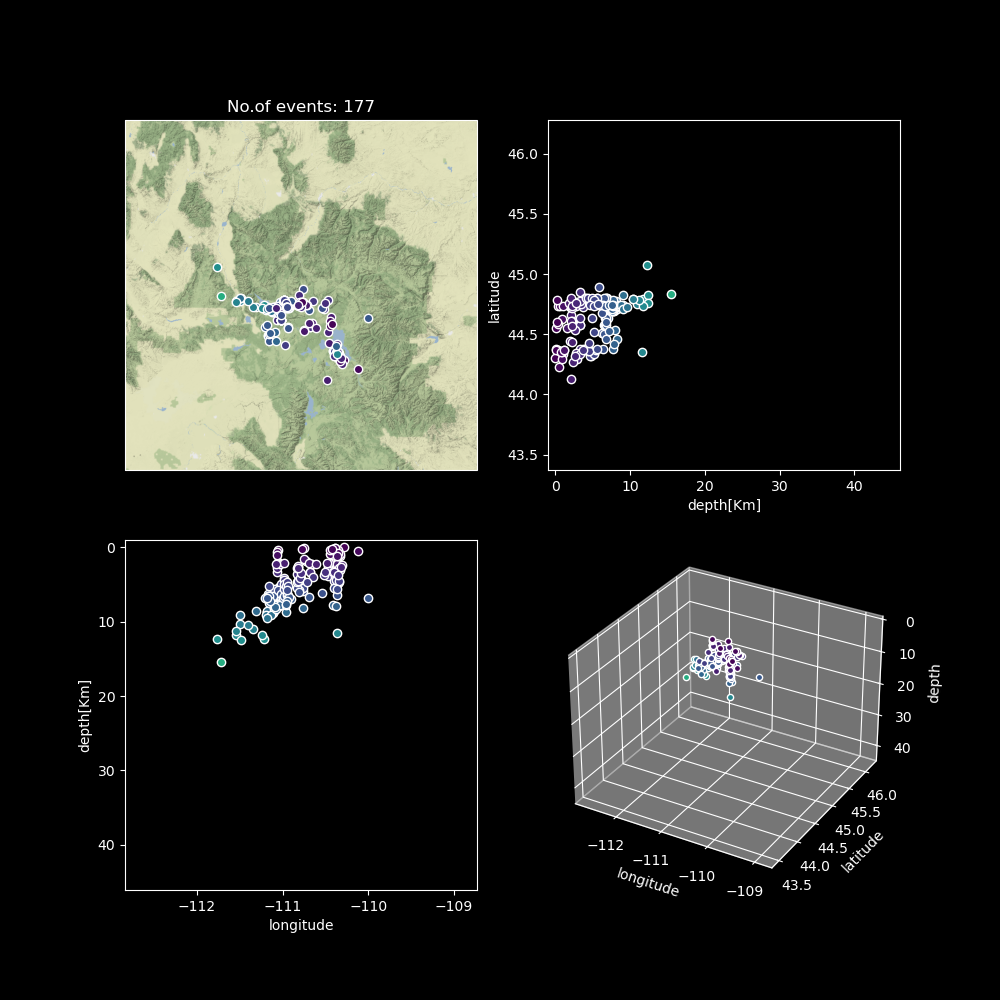

In [15]:
l = len(ev_lats)
%matplotlib notebook
x = ev_lats
y = ev_lons
z = depths_total.values[:,0]
depth = depths_total.values[:,0]
nfr = len(ev_lons)
fps = 20

#mag = np.array(mag).astype('float').reshape(1,l)
x = x.reshape(1,l)[0]
y = y.reshape(1,l)[0]
z = z.reshape(1,l)[0]

fig = plt.figure(figsize = [10,10] )
plt.style.use('dark_background')
ax2 = fig.add_subplot(2, 2, 2)
ax1 = fig.add_subplot(2, 2, 1,projection=ccrs.Mercator())
ax1.set_aspect('auto')
ax1.coastlines()
ax1.set_extent([min(y)-0.3,max(y)+0.3,min(x)-0.3,max(x)+0.3])
stamen_terrain = cigmt.Stamen('terrain-background')
ax1.add_image(stamen_terrain,10)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4,projection='3d')



ax4.set_xlabel('longitude')
ax4.set_ylabel('latitude')
ax4.set_zlabel('depth')
ax4.set_xlim(min(y)-0.3,max(y)+0.3)
ax4.set_ylim(min(x)-0.3, max(x)+0.3)
ax4.set_zlim(max(depth),0)

ax1.set_xlabel('longitude',transform=ccrs.PlateCarree())
ax1.set_ylabel('latitude',transform=ccrs.PlateCarree())
#ax2.set_xlim(min(y),max(y),transform=ccrs.PlateCarree())
#ax2.set_ylim(min(x),max(x),transform=ccrs.PlateCarree())

ax2.set_xlabel('depth[Km]')
ax2.set_ylabel('latitude')
ax2.set_ylim(min(x)-0.3, max(x)+0.3)
ax2.set_xlim(-1,max(depth)+2)

ax3.set_xlabel('longitude')
ax3.set_ylabel('depth[Km]')
ax3.set_xlim(min(y)-0.3, max(y)+0.3)
ax3.set_ylim(max(depth)+2, -1)

ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
ax3.ticklabel_format(useOffset=False)
ax4.ticklabel_format(useOffset=False)


def update(ifrm):
    ax1.set_title('No.of events: '+str(ifrm))
    #ax2.set_title('time: '+time[0][ifrm])
    ax4.scatter3D(y[ifrm],x[ifrm],z[ifrm],marker='o',c=depth[ifrm],cmap='viridis',vmin=0,vmax=25,edgecolor='white' )
    ax1.scatter(y[ifrm],x[ifrm],transform=ccrs.PlateCarree(),marker='o',c=depth[ifrm],cmap='viridis',vmin=0,vmax=25,edgecolor='white' )
    ax2.scatter(depth[ifrm],x[ifrm],marker='o',c=depth[ifrm],cmap='viridis',vmin=0,vmax=25,edgecolor='white' )
    ax3.scatter(y[ifrm],depth[ifrm],marker='o',c=depth[ifrm],cmap='viridis',vmin=0,vmax=25,edgecolor='white' )

    
    

ani = animation.FuncAnimation(fig, update, nfr, interval=0.000001,repeat=False)
#fig.colorbar(ax3_plot, ax=ax2,orientation='vertical',label='Depth[Km]')
#fig.colorbar(ax4_plot, ax=ax3,orientation='horizontal',label='Depth[Km]')
#plt.tight_layout()

#FFwriter = animation.FFMpegWriter(fps = 5000)
#ani.save('Yellowstone_Seismicity.mp4', writer = FFwriter)

#from IPython.display import HTML
#HTML(ani.to_html5_video())